In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
import os

In [4]:
IMAGE_SIZE=[224,224]
train_path=os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train')
valid_path=os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\test')

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 205s 2us/step


In [7]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
for layer in inception.layers:
    layer.trainable=False

In [9]:
folders=glob('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\*')

In [10]:
folders

['C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\diseased cotton leaf',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\diseased cotton plant',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\fresh cotton leaf',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\fresh cotton plant']

In [12]:
x=Flatten()(inception.output)

In [13]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
train_set=train_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train',
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [18]:
test_set=test_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\test',
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode='categorical')

Found 18 images belonging to 4 classes.


In [19]:
r=model.fit(
train_set,
validation_data=test_set,
epochs=20,
steps_per_epoch=len(train_set),
validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 95s 1s/step - loss: 4.7195 - accuracy: 0.5987 - val_loss: 0.7735 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 91s 1s/step - loss: 0.8915 - accuracy: 0.8657 - val_loss: 0.3406 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 93s 2s/step - loss: 0.5816 - accuracy: 0.8985 - val_loss: 0.3831 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 95s 2s/step - loss: 0.4800 - accuracy: 0.9137 - val_loss: 0.4553 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 97s 2s/step - loss: 0.4355 - accuracy: 0.9348 - val_loss: 0.0491 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 92s 1s/step - loss: 0.3189 - accuracy: 0.9375 - val_loss: 0.1067 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 91s 1s/step - loss: 0.3661 - accuracy: 0.9429 - val_loss: 0.7529 - val_accuracy: 0.8889
Epoch 8/20
61/61 [==

In [20]:
r.history

{'loss': [2.7206239700317383,
  0.7247506380081177,
  0.5295242071151733,
  0.5528731346130371,
  0.4980406165122986,
  0.38365063071250916,
  0.3892592191696167,
  0.48593220114707947,
  0.4448899030685425,
  0.539604127407074,
  0.8592425584793091,
  0.5769522786140442,
  0.610826849937439,
  0.480674684047699,
  0.4899492859840393,
  0.34468117356300354,
  0.5044726729393005,
  0.29052644968032837,
  0.43552473187446594,
  0.2862515449523926],
 'accuracy': [0.7232188582420349,
  0.8831368684768677,
  0.9077396392822266,
  0.9113275408744812,
  0.9318298101425171,
  0.9364428520202637,
  0.9369553923606873,
  0.9349051713943481,
  0.9364428520202637,
  0.9277293682098389,
  0.9210661053657532,
  0.9379805326461792,
  0.9374679923057556,
  0.9497693777084351,
  0.9456688761711121,
  0.9579702615737915,
  0.9446437954902649,
  0.9630958437919617,
  0.956432580947876,
  0.9728344678878784],
 'val_loss': [0.7735076546669006,
  0.34063684940338135,
  0.38310596346855164,
  0.4553485512733

In [21]:
import matplotlib.pyplot as plt

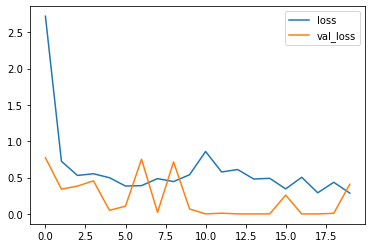

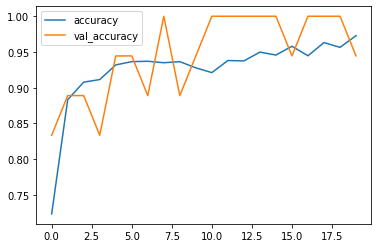

In [23]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()